# 1. Generalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

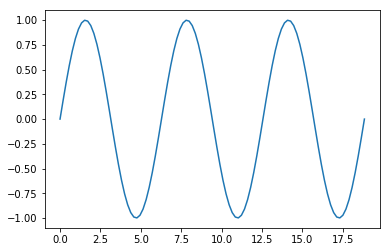

In [2]:
N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

plt.plot(X, Y)
plt.show()

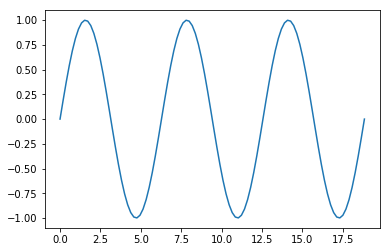

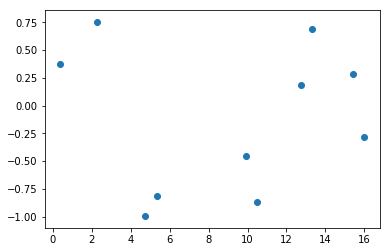

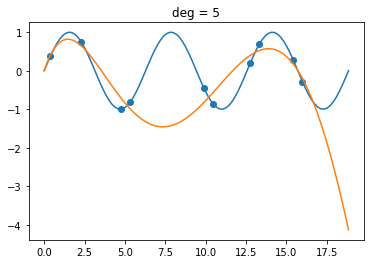

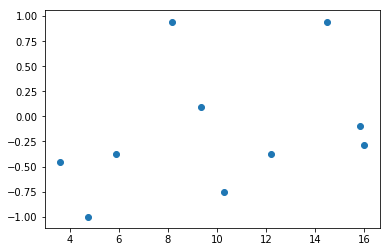

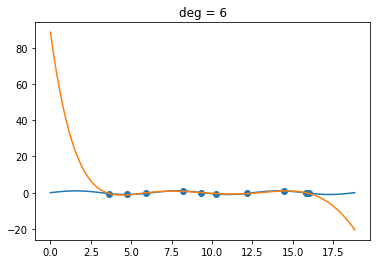

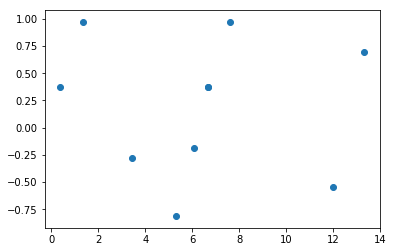

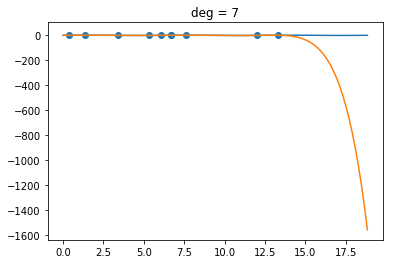

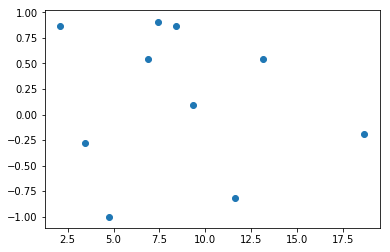

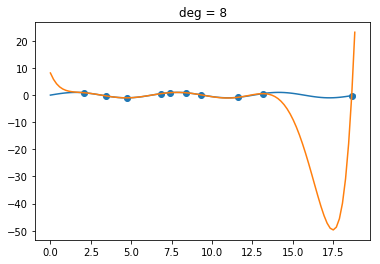

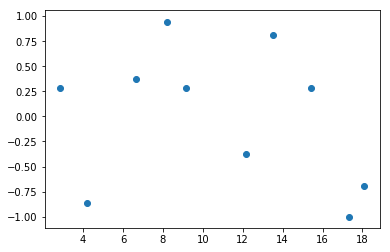

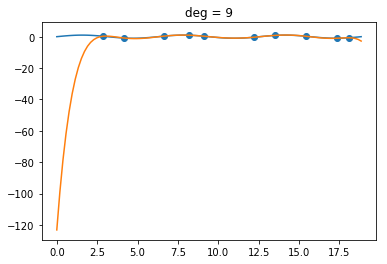

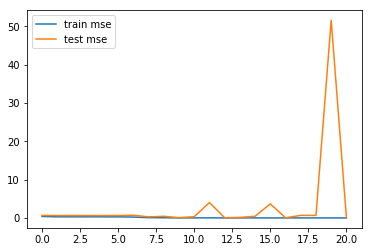

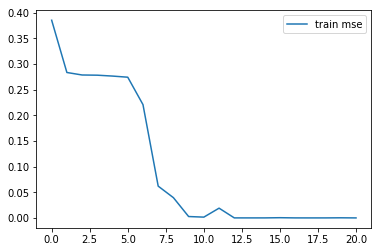

In [6]:
def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))


def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain)
    plt.show()

    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)

    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()


def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)


def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # make up some data and plot it
    N = 100
    X = np.linspace(0, 6*np.pi, N)
    Y = np.sin(X)

    plt.plot(X, Y)
    plt.show()

    for deg in (5, 6, 7, 8, 9):
        fit_and_display(X, Y, 10, deg)
    plot_train_vs_test_curves(X, Y)

## 2. L2 Regularization

In [17]:
import numpy as np
import matplotlib.pyplot as plt

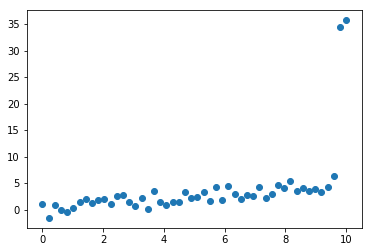

In [18]:
N = 50

X = np.linspace(0, 10, N)
Y = 0.5 * X + np.random.randn(N)

Y[-1] += 30
Y[-2] += 30

plt.scatter(X, Y)
plt.show()

### MLE

In [19]:
X = np.vstack([np.ones(N), X]).T

In [26]:
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)

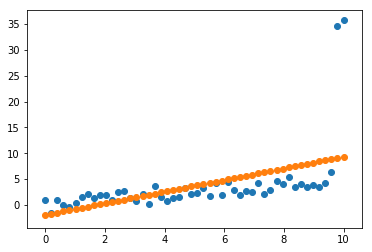

In [27]:
plt.scatter(X[:, 1], Y)
plt.scatter(X[:, 1], yhat_ml)
plt.show()

### MAP

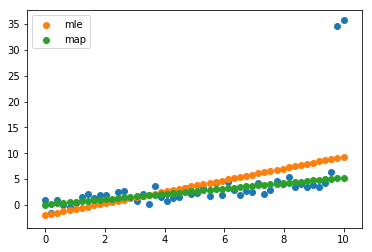

In [30]:
l2 = 1000.0
w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:, 1], Y)
plt.scatter(X[:, 1], Yhat_ml, label='mle')
plt.scatter(X[:, 1], Yhat_map, label='map')
plt.legend()
plt.show()

## 3. Gradient Descent

### 3-1. basic example: f(x) = x^2 

In [3]:
w = 20

for i in range(30):
    w =  w - 0.1 * 2 * w
    print(w)

16.0
12.8
10.24
8.192
6.5536
5.24288
4.194304000000001
3.3554432000000007
2.6843545600000005
2.1474836480000006
1.7179869184000005
1.3743895347200004
1.0995116277760002
0.8796093022208001
0.7036874417766401
0.562949953421312
0.45035996273704965
0.3602879701896397
0.28823037615171176
0.23058430092136942
0.18446744073709553
0.14757395258967643
0.11805916207174114
0.09444732965739291
0.07555786372591433
0.06044629098073147
0.048357032784585176
0.03868562622766814
0.030948500982134513
0.02475880078570761


### 3-2. Linear Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
D = 3

In [7]:
X = np.zeros((N, D))
X[: ,0] = 1
X[:5, 1] = 1
X[5:, 2] = 1

In [8]:
X

array([[ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.]])

In [9]:
Y = np.array([0] * 5 + [1] * 5)

In [10]:
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

- Linear Regression에서 X Input을 One-hot encoding으로 주면 Singular Matrix가 된다.
    
    -> Bias Term이 존재하므로
    
    -> Dummy Variable Trap

In [12]:
np.linalg.solve(X.T.dot(X), X.T.dot(Y))

LinAlgError: Singular matrix

- Gradient Descent로 극복할 수 있다.

In [13]:
costs = []
w = np.random.rand(D) / np.sqrt(D)
learning_rate = 0.001

for t in range(1000):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w -learning_rate * X.T.dot(delta)
    mse = delta.dot(delta) / N
    costs.append(mse)

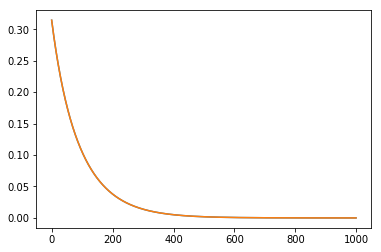

In [15]:
plt.plot(costs)
plt.show()

In [16]:
w

array([ 0.1816949 , -0.17816799,  0.81477809])

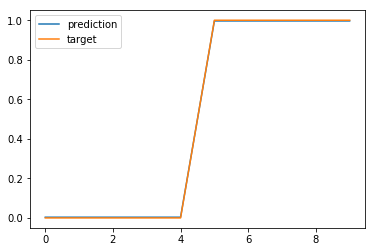

In [19]:
plt.plot(Yhat, label='prediction')
plt.plot(Y, label='target')
plt.legend()
plt.show()

### 3-3. L1 Regularization

In [25]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
D = 50

X = (np.random.random((N,D)) - 0.5) * 10
true_w = np.array([1, 0.5, -0.5] + [0] * (D-3))
Y = X.dot(true_w) + np.random.randn(N) * 0.5

In [28]:
print(np.shape(X), np.shape(Y), np.shape(true_w))

(50, 50) (50,) (50,)


In [29]:
costs = []
w = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
l1 = 10

for t in range(500):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w -learning_rate * (X.T.dot(delta) + l1 * np.sign(w))
    mse = delta.dot(delta) / N
    costs.append(mse)

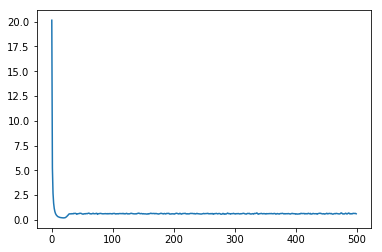

In [30]:
plt.plot(costs)
plt.show()

final w:  [  1.00608837e+00   4.12945063e-01  -4.81454632e-01   1.01795702e-02
  -2.19169636e-03   1.56105167e-02  -2.07386071e-02   6.39393242e-03
   4.85779628e-02  -8.19450465e-03  -3.31644721e-03   7.93472925e-03
  -2.53762046e-04   1.83380079e-03  -6.32135576e-03  -1.22376543e-02
   3.36892180e-02   3.29944269e-02   3.83436620e-02   3.06947180e-02
   3.76749053e-02   2.27060073e-02  -3.48478052e-02   7.85879312e-03
   5.20165218e-03  -2.30214020e-02  -4.93527250e-03   3.10630624e-02
  -1.18163382e-02   2.75190486e-02  -2.75320264e-02  -3.07775749e-02
   6.37395302e-03   1.13902699e-02  -3.40224012e-03  -1.10732462e-02
   8.74977268e-03   4.43247039e-02   9.26045356e-03  -1.20376199e-02
  -1.45466681e-02  -4.51927750e-03  -1.99385488e-02  -9.90198552e-03
  -1.75192429e-02   2.29490407e-02   4.90191116e-03  -5.02854116e-02
  -2.48659479e-02  -1.98179685e-02]


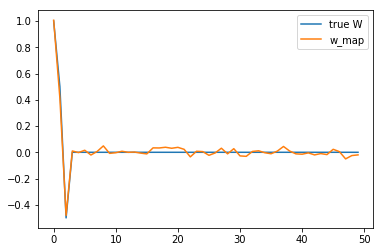

In [31]:
print("final w: ", w)
plt.plot(true_w, label='true W')
plt.plot(w, label='w_map')
plt.legend()
plt.show()